In [ ]:
import os

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-09-29 22:03:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.207, 172.253.62.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   171MB/s    in 0.6s    

2023-09-29 22:03:21 (171 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:

!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (384, 512, 3)


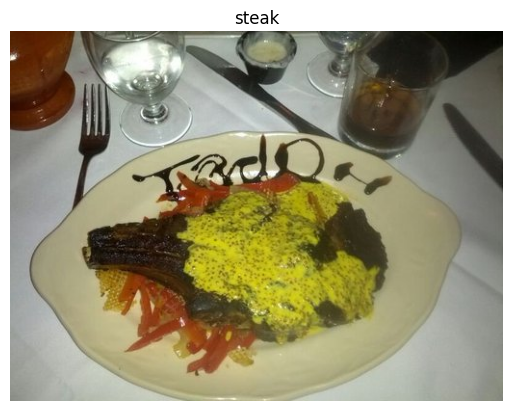

In [ ]:

# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

# Creating data to view and fit

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Sample input feature (x) as a 2D array
x_data = np.array([1.0, 2.0,
                   2.0, 3.0,
                   3.0], dtype=np.float32)

# Sample target variable (y) as a 1D array
y_data = np.array([3.0, 5.0, 7.0, 9.0, 11.0], dtype=np.float32)


In [ ]:
# Create TensorFlow tensors from the data
x = tf.constant(x_data, dtype=tf.float32)
y = tf.constant(y_data, dtype=tf.float32)

In [ ]:
# Print the tensors
print("Input (x):")
print(x.numpy())

print("\nTarget (y):")
print(y.numpy())

Input (x):
[1. 2. 2. 3. 3.]

Target (y):
[ 3.  5.  7.  9. 11.]


In [ ]:
# Random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])


model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

model.fit(x,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 5.7314 - mae: 5.7314
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 5.6730 - mae: 5.6730
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 5.6146 - mae: 5.6146
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 5.5562 - mae: 5.5562
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 5.4978 - mae: 5.4978


In [ ]:
x,y

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 2., 3., 3.], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 3.,  5.,  7.,  9., 11.], dtype=float32)>)

In [ ]:
y_pred = model.predict([1.])
y_pred

1/1 [==============================] - 0s 240ms/step


array([[0.7366272]], dtype=float32)

In [ ]:
y_pred + 5

array([[5.736627]], dtype=float32)

# Improve model

In [ ]:
# Lets rebuild model

model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])


model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 654ms/step - loss: 4.9405 - mae: 4.9405
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 4.8821 - mae: 4.8821
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 4.8237 - mae: 4.8237
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 4.7653 - mae: 4.7653
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 4.7069 - mae: 4.7069
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 4.6485 - mae: 4.6485
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 4.5901 - mae: 4.5901
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 4.5317 - mae: 4.5317
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 4.4733 - mae: 4.4733
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 4.4149 - mae: 4.4149
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - l

In [ ]:

x,y

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 2., 3., 3.], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 3.,  5.,  7.,  9., 11.], dtype=float32)>)

In [ ]:
# lets see if model improved
model.predict([1.])

1/1 [==============================] - 0s 116ms/step


array([[3.3841524]], dtype=float32)

In [ ]:
# Improve model with other feature
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1]),
  tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['mae']
              )

model.fit(x,y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 8.0262 - mae: 8.0262
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 7.9766 - mae: 7.9766
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 7.9272 - mae: 7.9272
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 7.8778 - mae: 7.8778
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 7.8285 - mae: 7.8285
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 7.7793 - mae: 7.7793
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 7.7302 - mae: 7.7302
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 7.6812 - mae: 7.6812
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 7.6322 - mae: 7.6322
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5833 - mae: 7.5833
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss

In [ ]:
x, y

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 2., 3., 3.], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 3.,  5.,  7.,  9., 11.], dtype=float32)>)

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 108ms/step


array([[24.708355]], dtype=float32)

# Evaluating model

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

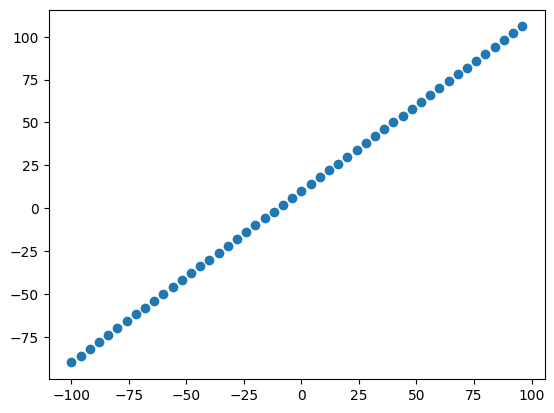

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

## 3 sets

1. Trining set: Course material
2. Validation set: Price tests
3. Test set: Final test

In [ ]:
# Check the length of samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets

In [ ]:
X_train = X[:40] # First 40 are training samples
y_train = y[:40]

X_test = X[40:] #20% of data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualize data

Now we have trauining and test sets, lets visualize it again

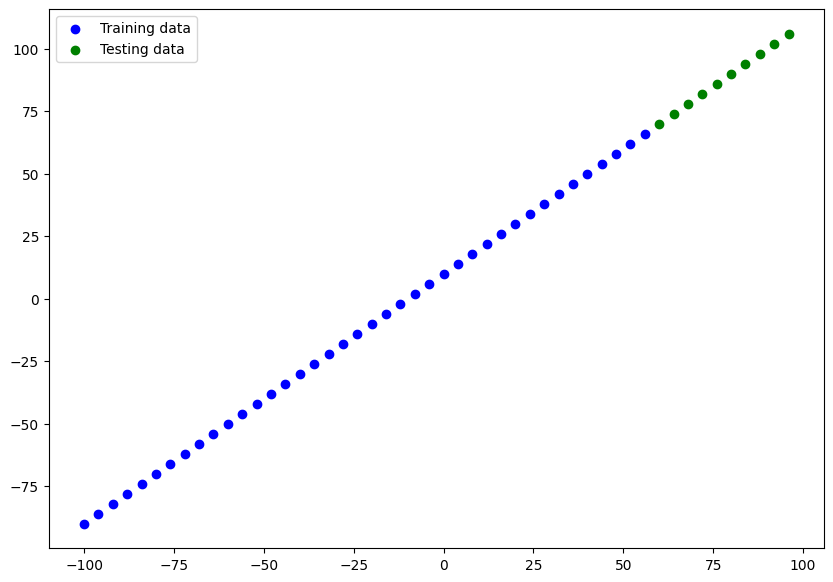

In [ ]:
plt.figure(figsize=(10, 7))
# PLot data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
# show a legend
plt.legend()

In [ ]:
# Lets have a look at how to build a neurapl network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit model
model.fit(X_train, y_train, epochs=110, verbose=0)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params: total number of params in the model
* Trainable params: these are the params the model can update as it trains
* Non trainable params: Params arent updated during training, usually for already trained model or transfer learning process

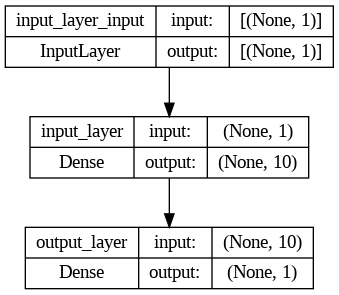

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing models

Iis a good idea to plot them against the ground truth labels.

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 122ms/step


array([[51.147976],
       [54.52718 ],
       [57.90639 ],
       [61.285603],
       [64.66481 ],
       [68.04402 ],
       [71.42322 ],
       [74.80243 ],
       [78.18164 ],
       [81.56085 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  # Plot trainin data
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()


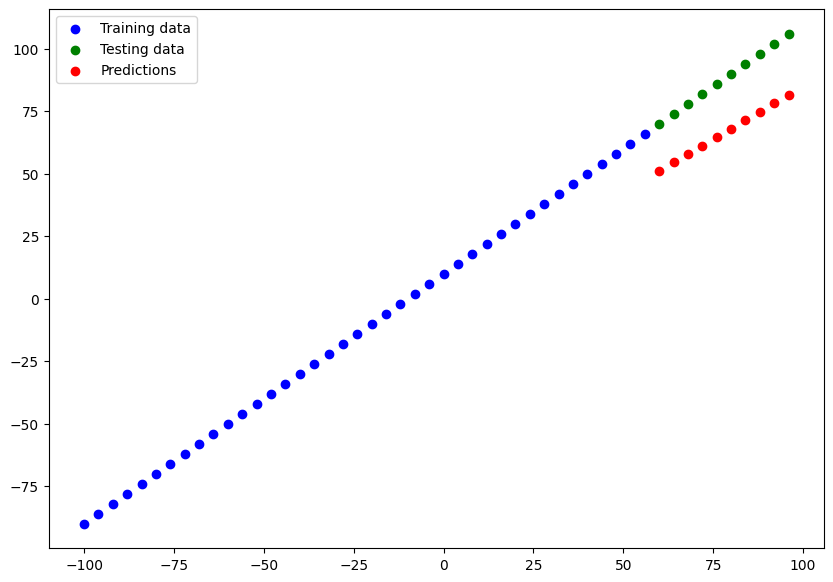

In [ ]:
plot_predictions()

### Evaluation our models prediction with regression

Since we are working on  a regression, two of the main metrics:
 * MAE - mean absolute error: "on average, how wrong is each of my model's predictions".
 * MSE -mean square error, "square the average errors"

In [ ]:
# Evaluate model on the test set

model.evaluate(X_test, y_test)


1/1 [==============================] - 1s 623ms/step - loss: 21.6456 - mae: 21.6456


[21.645587921142578, 21.645587921142578]

In [ ]:
# Calculate MAE
mae = tf.keras.losses.MAE(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.852024 , 33.47282  , 30.093609 , 26.714397 , 23.33519  ,
       19.955978 , 16.861425 , 14.3185425, 12.327344 , 10.975659 ],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.constant(y_pred)


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[51.147976],
       [54.52718 ],
       [57.90639 ],
       [61.285603],
       [64.66481 ],
       [68.04402 ],
       [71.42322 ],
       [74.80243 ],
       [78.18164 ],
       [81.56085 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([51.147976, 54.52718 , 57.90639 , 61.285603, 64.66481 , 68.04402 ,
       71.42322 , 74.80243 , 78.18164 , 81.56085 ], dtype=float32)>

In [ ]:
# Calculate again MAE
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=21.645588>

In [ ]:
# calculate MAE error
mse = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=21.645588>

In [ ]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

Lets do 3 modeling experiments:

1. Model1 = same as the original model, 1 layer, trainded for 100 epochs
2. model2 = 2 layers, trained for 100 epochs
3. model3 = 2 layers, trained for 500 epochs

**Build model 1**

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 12.9004 - mae: 12.9004
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1374 - mae: 12.1374
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4064 - mae: 11.4064
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4831 - mae: 9.4831
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.3811 - mae: 10.3811
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.6170 - mae: 9.6170
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.7255 - mae: 8.7255
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0505 - mae: 9.0505
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 19.1532 - mae: 19.1532
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.3326 - mae: 10.3326
Epoch 11/100
2/2 [==============================] - 0s 14ms/ste

1/1 [==============================] - 0s 54ms/step


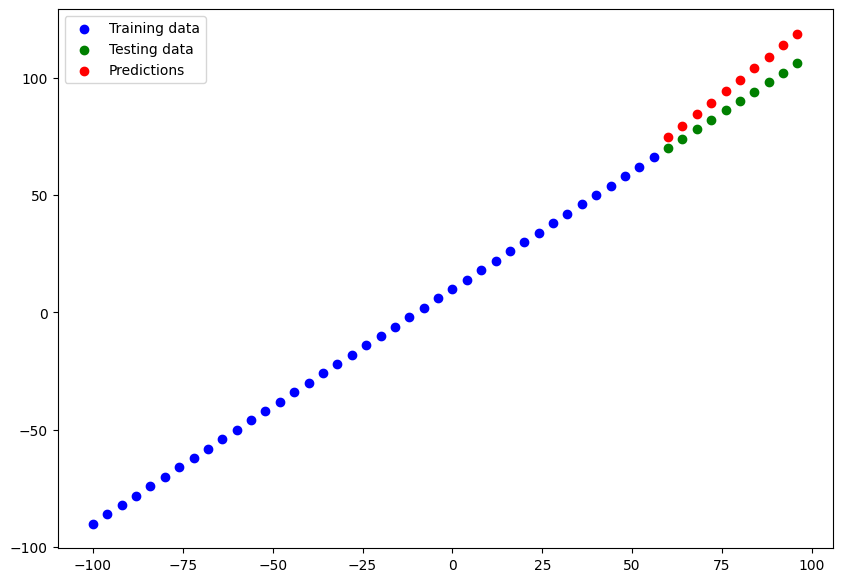

In [ ]:
# Make and plot predictions for model 1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_! evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.643504>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.226>)

**Build model_2**

* 2 dense layers, 100 epochs

In [ ]:
# Create model_2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

# Fit model
model_2.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 51.5841 - mse: 3873.4792
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 36.7941 - mse: 1947.0110
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 31.9122 - mse: 1526.4393
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 16.5982 - mse: 419.8456
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 22.1163 - mse: 716.6763
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2191 - mse: 182.9858
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 13.7576 - mse: 276.5028
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 13.0724 - mse: 235.7479
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 34.5889 - mse: 1800.9475
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 23.9770 - mse: 804.6569
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 58ms/step


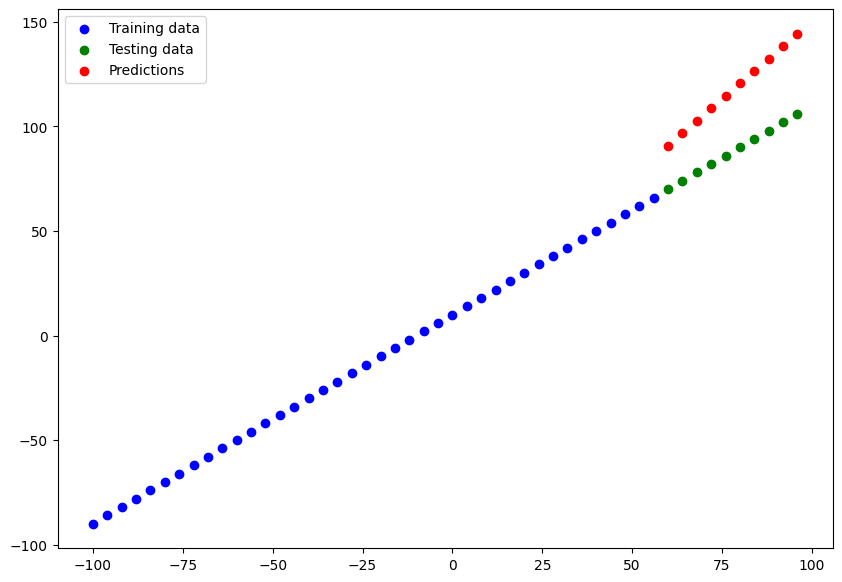

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate moddel_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.573267>,
 <tf.Tensor: shape=(), dtype=float32, numpy=905.4844>)

**Build model 3**
* 2 layers, 500 epochs

In [ ]:
# Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

model.fit(X_train, y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 7.7339 - mae: 7.7339
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 8.3548 - mae: 8.3548
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 8.7983 - mae: 8.7983
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 8.3421 - mae: 8.3421
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 7.7137 - mae: 7.7137
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 7.5638 - mae: 7.5638
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 7.2498 - mae: 7.2498
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 7.6861 - mae: 7.6861
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 10.6798 - mae: 10.6798
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 8.4982 - mae: 8.4982
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - loss: 7.59

1/1 [==============================] - 0s 91ms/step


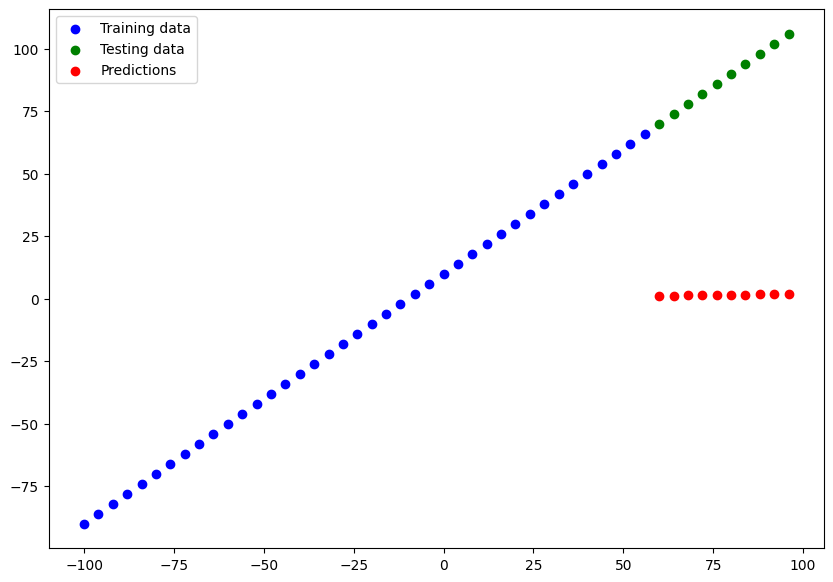

In [ ]:
# Plot preditcions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate moddel_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=86.44245>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7599.079>)

# Comparin results of our experiments

In [ ]:
# Lets compare out model's results using pandas dataframe

import pandas as pd

model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
     ["model_2", mae_2.numpy(), mse_2.numpy()],
     ["model_3", mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,8.643504,81.225998
1,model_2,29.573267,905.484375
2,model_3,86.442451,7599.079102


Looks like model 2 performes the best

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Saving models

1. The savedmodel format
2. The HDF5 form

In [ ]:
# Save model with sabedmodel format
model_2.save("model_2_savedmodel")

In [ ]:
# Save model with hdf5
model_2.save("model_2_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading in a saved model

In [ ]:
# Load in the saved model format model
loaded_savedModel_format = tf.keras.models.load_model('/content/model_2_savedmodel')
loaded_savedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with savedModel format model predictions

model_2_preds = model_2.predict(X_test)
loaded_savedModel_format_preds = loaded_savedModel_format.predict(X_test)
model_2_preds == loaded_savedModel_format_preds

1/1 [==============================] - 0s 35ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load HDF5 model

loaded_h5_model = tf.keras.models.load_model('/content/model_2_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Download a model (or any other file) from google colab
from google.colab import files
files.download('/content/model_2_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from colab to google drive
!cp /content/model_2_HDF5_format.h5 /content/drive/MyDrive/PyTorch Course

cp: target 'Course' is not a directory


# A larger example. Putting all together

In [1]:
# IMport required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Lets try one hot encode out dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
# Create X and y values feature and lables
X = insurance_one_hot.drop(columns=['charges'],axis=1)
y = insurance_one_hot['charges']


In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Divide train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)


(1070, 268, 1070, 268)

In [9]:
# X_train = np.asarray(X_train).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)
# X_train.shape, y_train.shape


In [10]:
# Set random seed
tf.random.set_seed(42)

#Create model

insurance_model = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8687.4141 - mae: 8687.4141
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7887.0581 - mae: 7887.0581
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7594.6719 - mae: 7594.6719
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7752.1621 - mae: 7752.1621
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7689.1978 - mae: 7689.1978
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7646.9209 - mae: 7646.9209
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7547.6841 - mae: 7547.6841
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7722.1670 - mae: 7722.1670
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7550.8208 - mae: 7550.8208
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7675.5771 - mae: 7675.5771

In [11]:
#Check results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8367.7861 - mae: 8367.7861


[8367.7861328125, 8367.7861328125]

In [12]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Try to improve model
1. Add an extra layer with hidden units
2. Same as above, but Train for longer, 200 epochs

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
insurance_model_2.fit(X_train,y_train, epochs=100, verbose=0)

In [14]:
# Evaluate model 2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4842.3652 - mae: 4842.3652


[4842.365234375, 4842.365234375]

In [15]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8367.7861 - mae: 8367.7861


[8367.7861328125, 8367.7861328125]

In [16]:
# Create model 3

# Set random seed
tf.random.set_seed(42)

# Create model

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
])

# Compile model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# Fit model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [17]:

# Evaluate model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3489.4136 - mae: 3489.4136


[3489.41357421875, 3489.41357421875]

Text(0.5, 0, 'epochs')

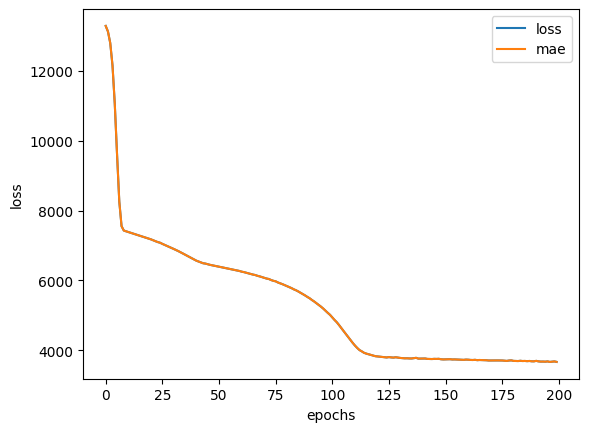

In [18]:
# PLot history (aka loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Pre processing data - normalizations and standarization

If not sure what to use, try botrh to see which performs better

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Get data from github
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare data, we can borow a fer classes from scikit learn

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [46]:
# See our data
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [48]:
# See our data
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [49]:
# Check shapes
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

##  Data has been normalized and one hot encoded. Now lets build a neural network

In [42]:
# Buil a neural network

tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),
])

insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mse']
)

insurance_model_4.fit(X_train_normal, y_train, epochs = 200)

NameError: ignored

In [59]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3442.2654 - mse: 41926888.0000


[3442.265380859375, 41926888.0]

In [34]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


<Axes: ylabel='Frequency'>

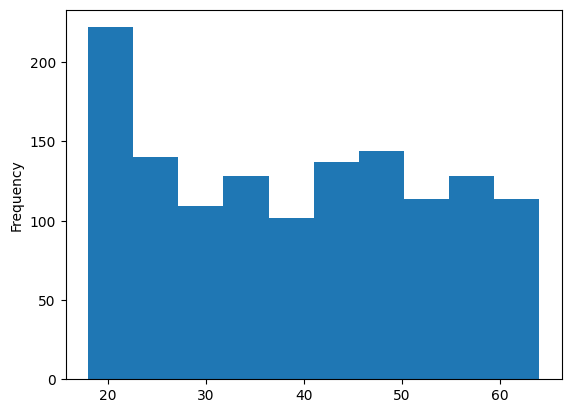

In [21]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

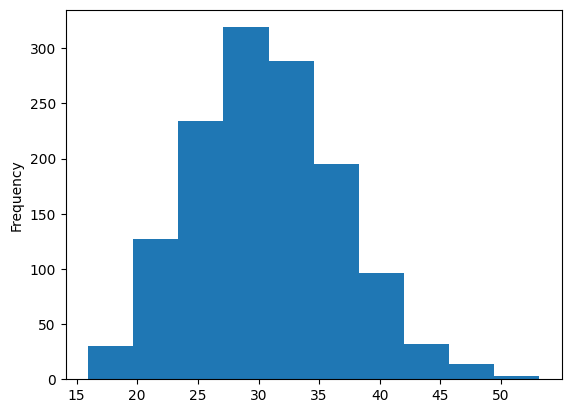

In [22]:
X['bmi'].plot(kind='hist')

In [23]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Practice

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [18]:

# Make labels for the dataset (adhering to the same patt
y = np.arange(-90,110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [6]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [77]:
from sklearn.model_selection import train_test_split

# Split data set

# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

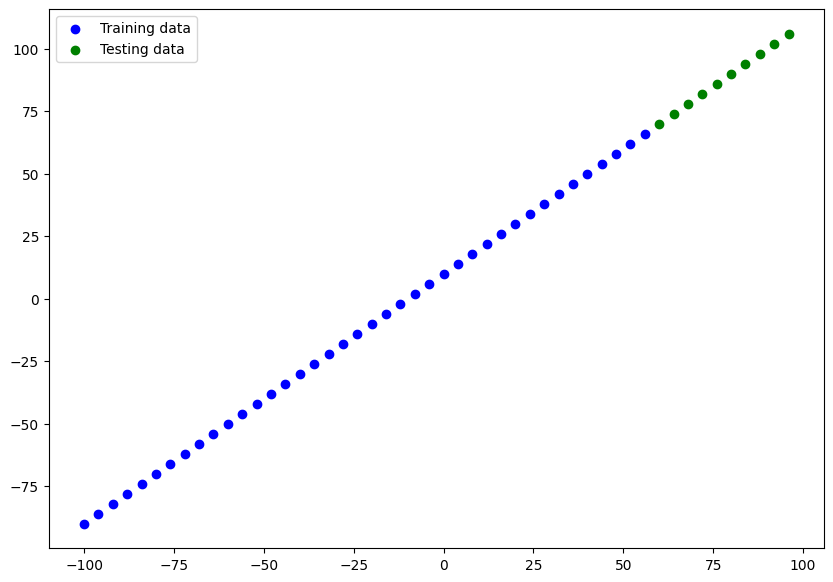

In [16]:
# Visualize data

plt.figure(figsize=(10, 7))

# Plot trainin data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show legend
plt.legend()


In [53]:
# Buyild model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=[1]),
     tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 2s 27ms/step - loss: 35.9468 - mae: 35.9468
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2426 - mae: 10.2426
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 17.6624 - mae: 17.6624
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 12.4089 - mae: 12.4089
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 8.9640 - mae: 8.9640
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 10.6768 - mae: 10.6768
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 7.6951 - mae: 7.6951
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 9.4440 - mae: 9.4440
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 8.3930 - mae: 8.3930
Epoch 10/100
2/2 [==============================] - 0s 19ms/step - loss: 8.7235 - mae: 8.7235
Epoch 11/100
2/2 [==============================] - 0s 23ms

In [55]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 192ms/step - loss: 6.8323 - mae: 6.8323


[6.832251071929932, 6.832251071929932]

In [56]:
y_pred = model_1.predict(X_test)

1/1 [==============================] - 0s 64ms/step


In [29]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  # Plot trainin data
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()


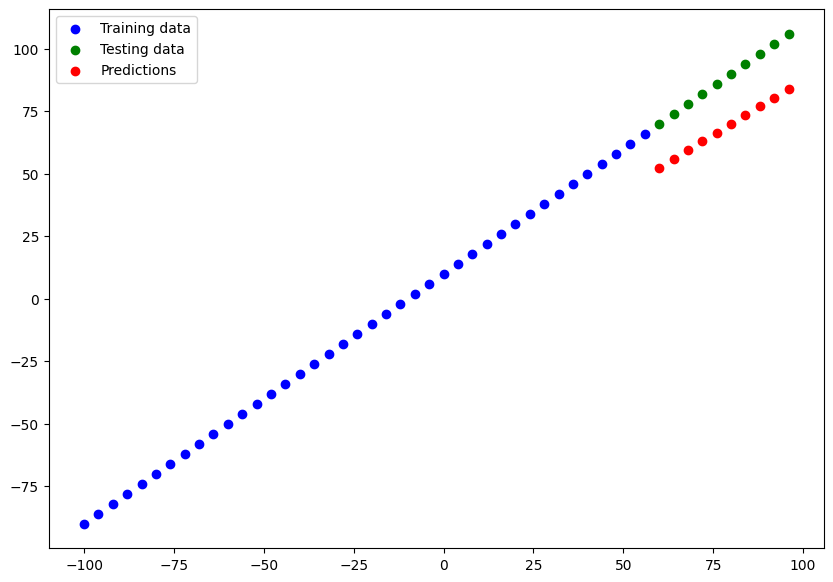

In [57]:
plot_predictions()

In [81]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [82]:

len(x_train), len(y_train), len(x_test), len(y_test)

(404, 404, 102, 102)

In [88]:
# Buyild model

tf.random.set_seed(42)

house_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
     tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
])

house_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

history_prices = house_model.fit(x_train, y_train, epochs=100)


Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 97.8326 - mae: 97.8326
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 20.8320 - mae: 20.8320
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 9.5840 - mae: 9.5840
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 8.9358 - mae: 8.9358
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 10.7275 - mae: 10.7275
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 12.7741 - mae: 12.7741
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 16.5739 - mae: 16.5739
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 11.1045 - mae: 11.1045
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 9.2225 - mae: 9.2225
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 9.8861 - mae: 9.8861
Epoch 11/100
13/13 [===========================

In [90]:
house_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 4.3568 - mae: 4.3568


[4.356760501861572, 4.356760501861572]

In [91]:
house_y_predict = house_model.predict(x_test)


4/4 [==============================] - 0s 3ms/step


In [92]:
x_train.shape, y_train.shape

((404, 13), (404,))

Text(0.5, 0, 'epochs')

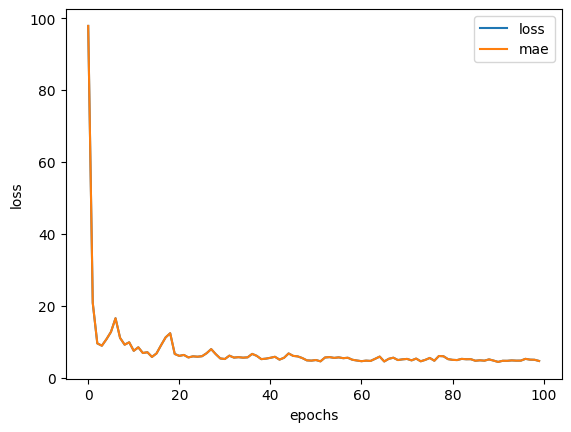

In [89]:
# PLot history (aka loss curve or training curve)
pd.DataFrame(history_prices.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [94]:
# Check the shapes of x_test and y_test
print(x_test.shape, y_test.shape)

# Reshape y_test to match the number of samples in x_test
y_test = y_test[:x_test.shape[0]]

# Check the shapes again
print(x_test.shape, y_test.shape)

(102, 13) (102,)
(102, 13) (102,)


In [98]:
print(x_test.shape)
print(y_test.shape)
print(house_y_predict.shape)


(102, 13)
(102,)
(102, 1)


ValueError: ignored

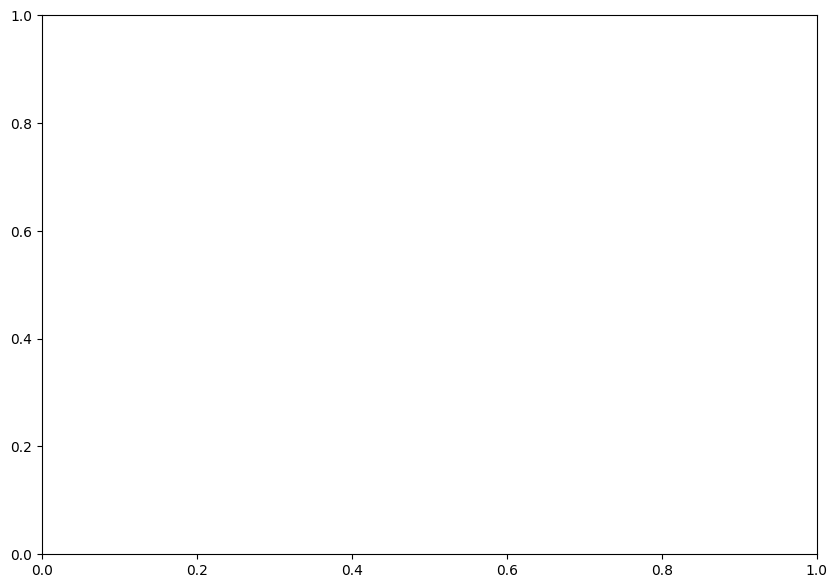

In [95]:
import matplotlib.pyplot as plt



def plot_predictions(test_data, test_labels, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(test_data, test_labels, label="True labels", color="blue")
    plt.scatter(test_data, predictions, label="Predictions", color="red")
    plt.xlabel("Input Features")
    plt.ylabel("Target")
    plt.legend()
    plt.title("True Labels vs. Predictions")
    plt.show()

# Assuming you have already trained your model and made predictions
# house_y_predict = house_model.predict(x_test)

plot_predictions(test_data=x_test, test_labels=y_test, predictions=house_y_predict)
